# Exploratory Data Analysis

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')


In [2]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

### Understand the Dataset

In [3]:
df.shape

(7043, 21)

In [4]:
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
display(df.info())
display(df.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Converting 'TotalCharges' to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') 
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [7]:
# 6. target distribution
display(df["Churn"].value_counts())
display(df["Churn"].value_counts(normalize=True) * 100)

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

### Clean the Data

In [8]:
# Convert blank strings or spaces to NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Count missing values per column
missing_summary = df.isna().sum()
display(missing_summary)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

# Remove duplicates if any
df = df.drop_duplicates()
print("Dataset shape after removing duplicates:", df.shape)

Number of duplicate rows: 0
Dataset shape after removing duplicates: (7043, 21)


### Categorical Features Analysis

In [10]:
# List of categorical features to analyze
categorical_features_binary = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
categorical_features_multi = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                              'Contract', 'PaymentMethod']
for col in categorical_features_binary:
    print(f"--- {col} ---")
    counts = df[col].value_counts()
    percent = df[col].value_counts(normalize=True) * 100
    display(pd.concat([counts, percent], axis=1, keys=['Count', 'Percentage']))


--- gender ---


,Count,Percentage
gender,,
Male,3555,50.47565
Female,3488,49.52435


--- SeniorCitizen ---


,Count,Percentage
SeniorCitizen,,
0,5901,83.785319
1,1142,16.214681


--- Partner ---


,Count,Percentage
Partner,,
No,3641,51.69672
Yes,3402,48.30328


--- Dependents ---


,Count,Percentage
Dependents,,
No,4933,70.041176
Yes,2110,29.958824


--- PhoneService ---


,Count,Percentage
PhoneService,,
Yes,6361,90.316626
No,682,9.683374


--- PaperlessBilling ---


,Count,Percentage
PaperlessBilling,,
Yes,4171,59.221922
No,2872,40.778078


--- Churn ---


,Count,Percentage
Churn,,
No,5174,73.463013
Yes,1869,26.536987


### Univariate Analysis - binary categorical features

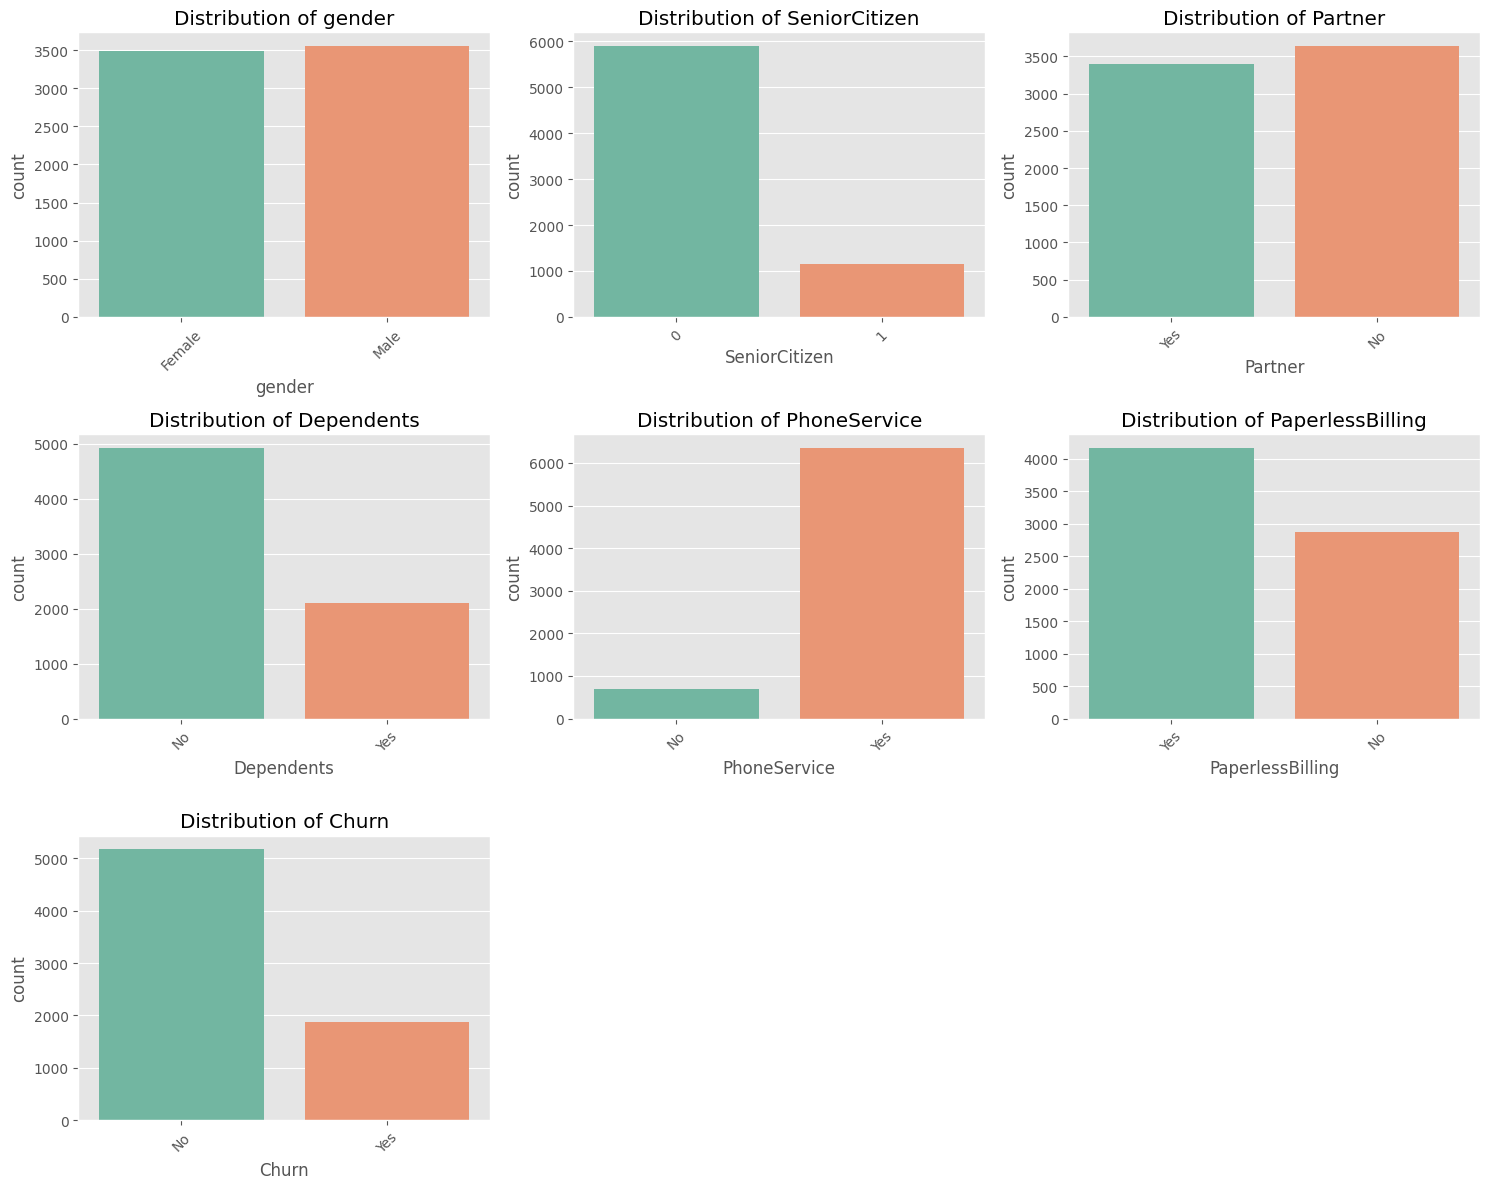

In [11]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Determine layout (e.g., 3 columns)
n_cols = 3
n_rows = math.ceil(len(categorical_features_binary) / n_cols)

# 2. Create the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))

# 3. Flatten axes array for easy iteration (handles 2D arrays)
axes = axes.flatten()

# 4. Loop through features and plot on specific axes
for i, col in enumerate(categorical_features_binary):
    sns.countplot(data=df, x=col, palette='Set2', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45) # Optional: Rotates labels if they overlap

# 5. Remove any empty subplots (if features don't fill the last row)
for i in range(len(categorical_features_binary), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Univariate Analysis - multi-categorical

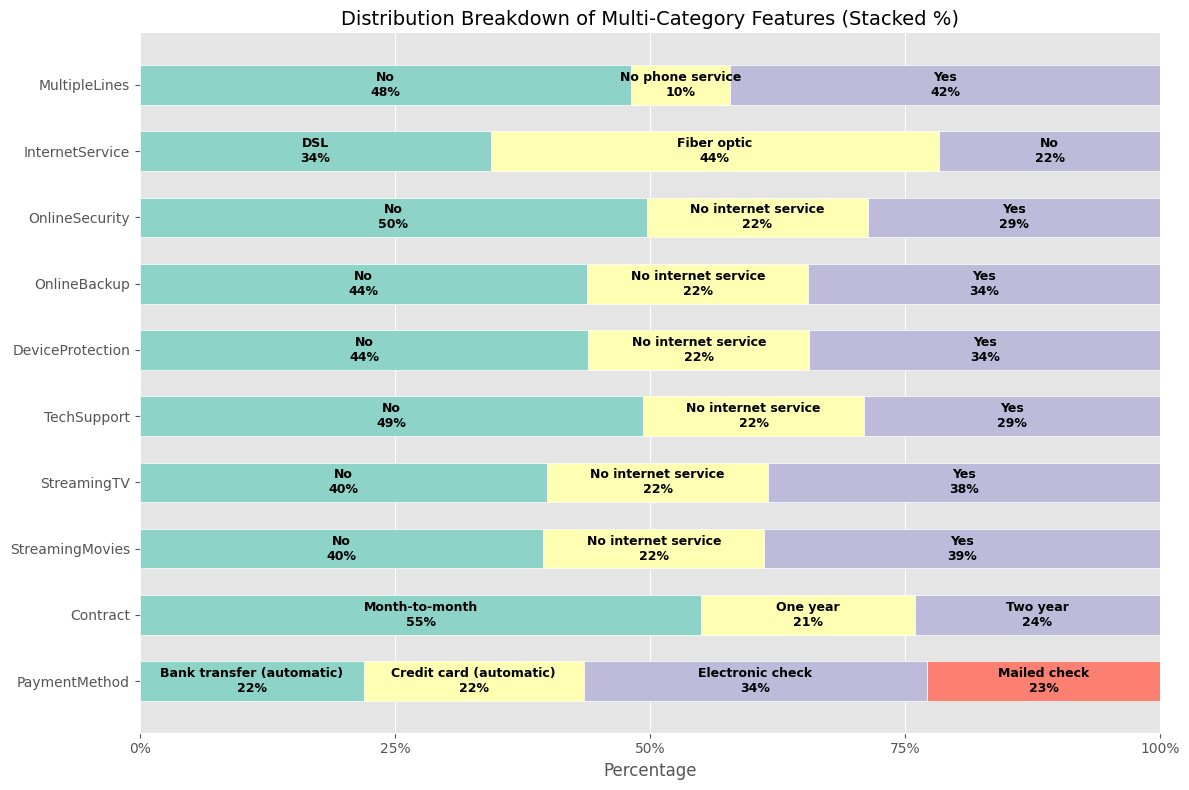

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the features to plot
categorical_features_multi = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaymentMethod'
]

# Create the figure
plt.figure(figsize=(12, 8))

# We will build the plot bar by bar (feature by feature)
# Iterate through the features in reverse so the top item in the list appears at the top of the chart
for i, col in enumerate(reversed(categorical_features_multi)):
    
    # 1. Calculate the percentage of each category
    counts = df[col].value_counts(normalize=True).sort_index()
    
    # 2. Track the "left" position to stack bars horizontally
    left_pos = 0
    
    # 3. Create a horizontal bar for each category within the feature
    for idx, (category, percentage) in enumerate(counts.items()):
        # Use a distinct palette color for each segment
        color = sns.color_palette("Set3", n_colors=len(counts))[idx]
        
        # Plot the segment
        plt.barh(
            y=col, 
            width=percentage, 
            left=left_pos, 
            color=color, 
            edgecolor='white', 
            height=0.6
        )
        
        # 4. Add text annotations (Category Name + %) inside the bar
        # Only add text if the segment is wide enough to be readable (> 5%)
        if percentage > 0.05:
            plt.text(
                x=left_pos + (percentage / 2), 
                y=i, 
                s=f"{category}\n{percentage:.0%}", 
                ha='center', 
                va='center', 
                fontsize=9, 
                color='black', 
                weight='bold'
            )
        
        # Update the left position for the next segment
        left_pos += percentage

# Formatting the chart
plt.title("Distribution Breakdown of Multi-Category Features (Stacked %)", fontsize=14)
plt.xlabel("Percentage")
plt.xlim(0, 1) # Ensure x-axis is 0 to 100%
plt.xticks([0, 0.25, 0.5, 0.75, 1.0], ['0%', '25%', '50%', '75%', '100%'])


# Remove the top and right spines for a cleaner look
sns.despine(left=True, bottom=False)

plt.tight_layout()
plt.show()

In [13]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Summary statistics
display(df[numerical_features].describe())

# Additional metrics
for col in numerical_features:
    print(f"--- {col} ---")
    print("Range:", df[col].max() - df[col].min())
    print("Median:", df[col].median())
    print("Standard Deviation:", df[col].std())
    print("\n")


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


--- tenure ---
Range: 72
Median: 29.0
Standard Deviation: 24.55948102309446


--- MonthlyCharges ---
Range: 100.5
Median: 70.35
Standard Deviation: 30.090047097678493


--- TotalCharges ---
Range: 8666.0
Median: 1397.475
Standard Deviation: 2266.771361883145




## Histograms & Boxplots

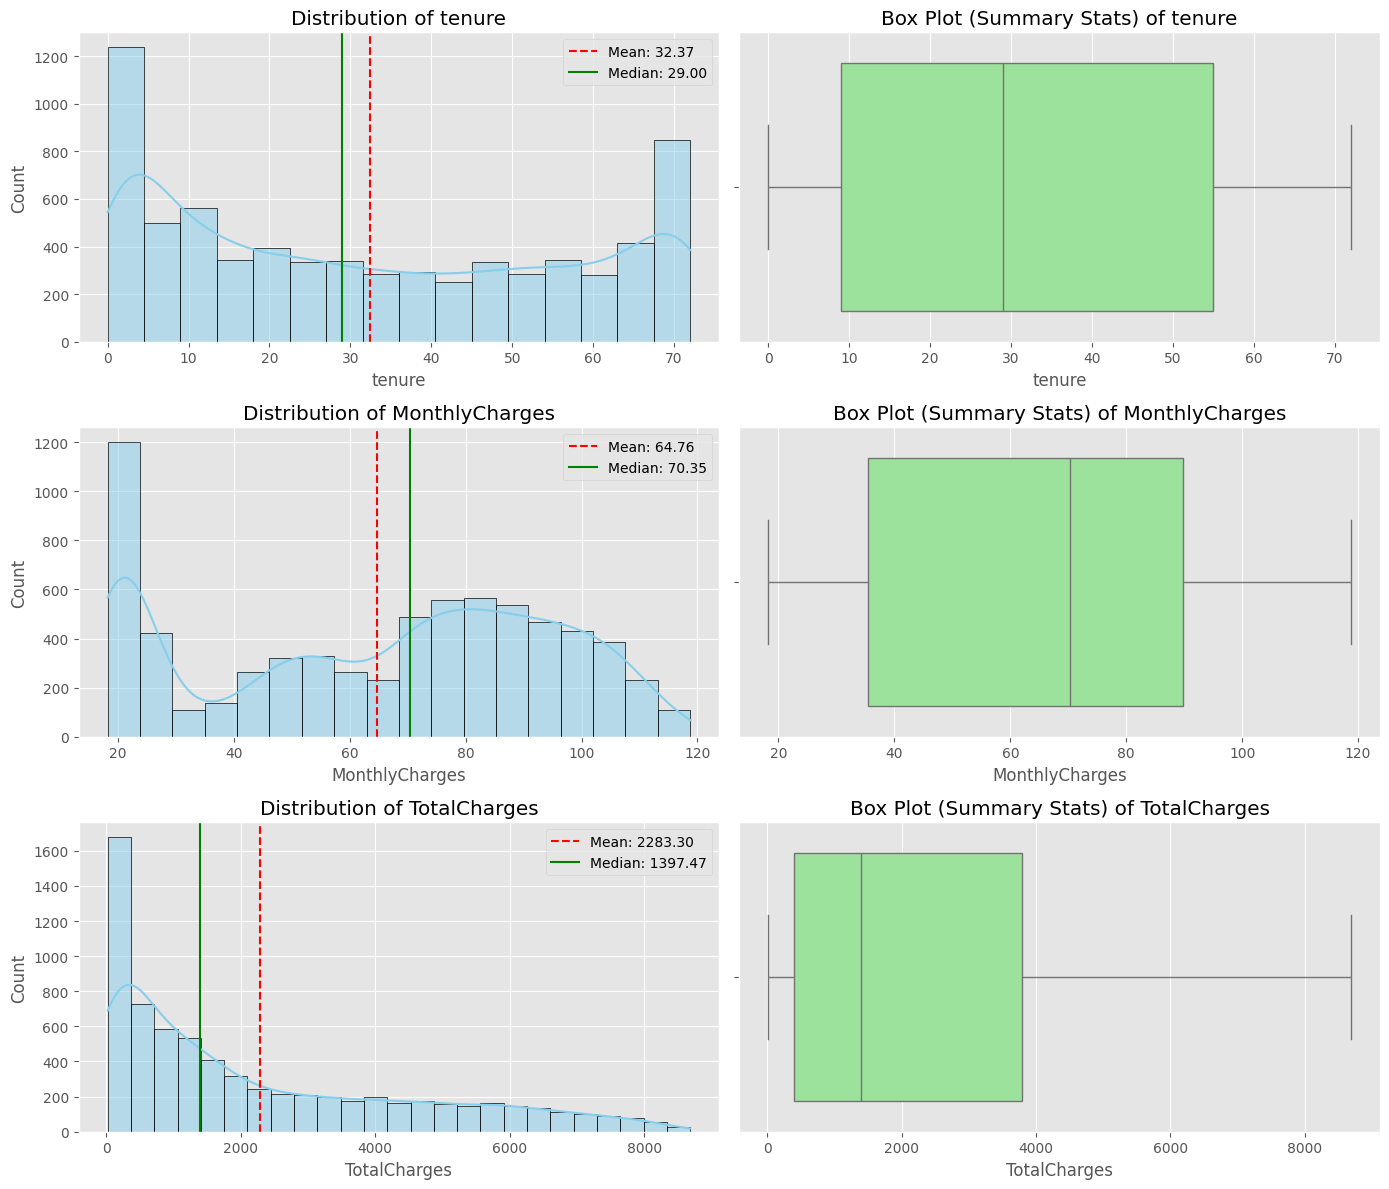

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a figure with 3 rows (features) and 2 columns (Histogram, Boxplot)
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(14, 12))

for i, col in enumerate(numerical_features):
    
    # --- Plot 1: Histogram with KDE (Distribution) ---
    # This shows the shape, range, and standard deviation visually
    sns.histplot(data=df, x=col, kde=True, ax=axes[i, 0], color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'Distribution of {col}')
    
    # Add vertical lines for Mean and Median to the histogram
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[i, 0].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i, 0].axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    axes[i, 0].legend()

    # --- Plot 2: Box Plot (Summary Statistics) ---
    # This directly visualizes the describe() table: Min, Q1, Median, Q3, Max, and Outliers
    sns.boxplot(data=df, x=col, ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Box Plot (Summary Stats) of {col}')

plt.tight_layout()
plt.show()

### Bivariate Analysis

In [15]:
categorical_features = ['gender', 'Contract', 'Dependents', 'Partner', 'PaperlessBilling']

for col in categorical_features:
    print(f"--- Churn by {col} ---")
    ctab = pd.crosstab(df[col], df['Churn'])
    ctab_percent = ctab.div(ctab.sum(axis=1), axis=0) * 100
    display(ctab, ctab_percent)


--- Churn by gender ---


Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


Churn,No,Yes
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338


--- Churn by Contract ---


Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


--- Churn by Dependents ---


Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


Churn,No,Yes
Dependents,,
No,68.720860,31.279140
Yes,84.549763,15.450237


--- Churn by Partner ---


Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903


--- Churn by PaperlessBilling ---


Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


Churn,No,Yes
PaperlessBilling,,
No,83.669916,16.330084
Yes,66.434908,33.565092


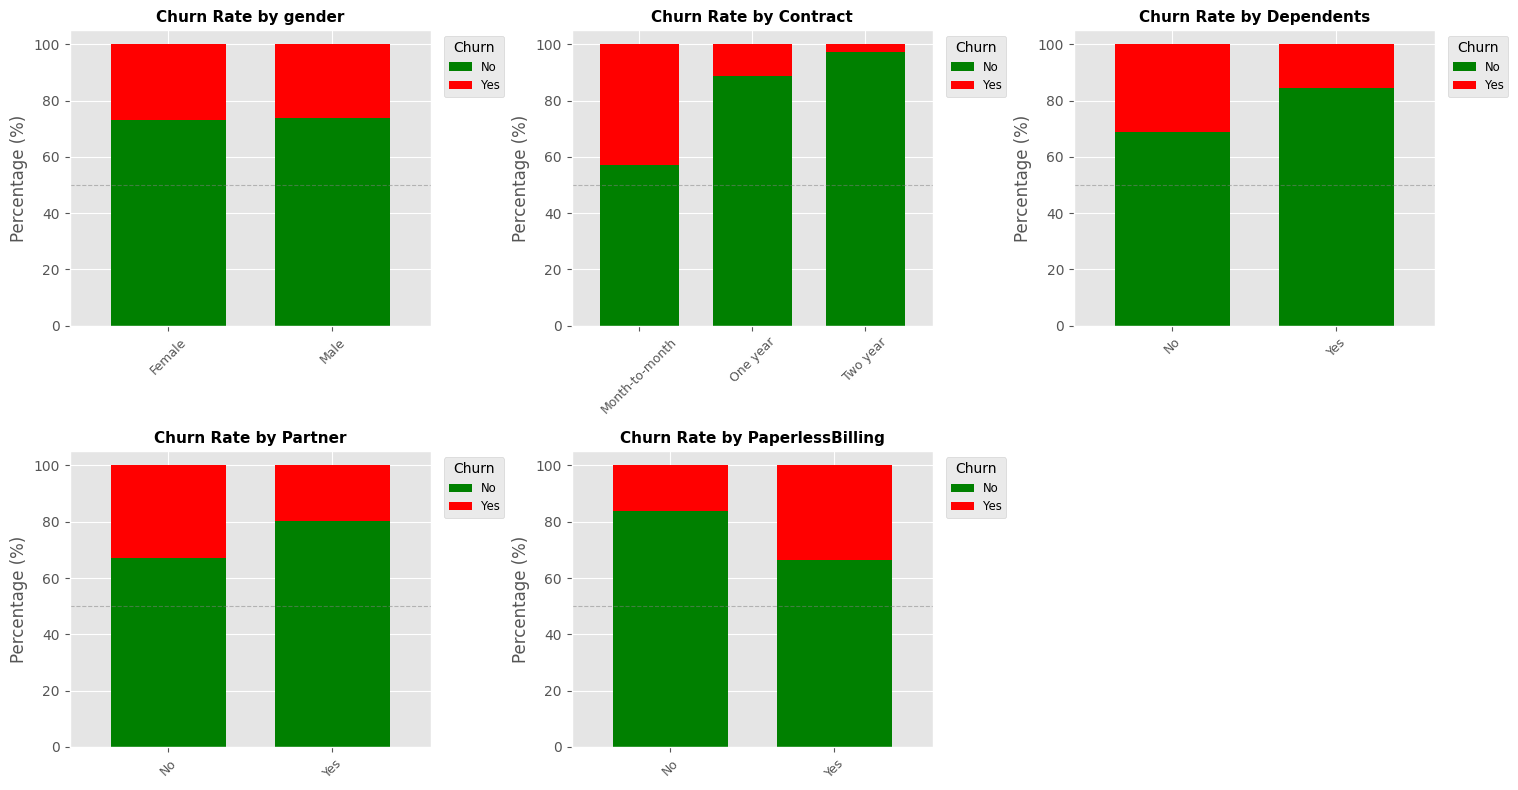

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# --- Configuration ---
# Define the specific color map requested
color_map = {'Yes': 'red', 'No': 'green'}


# --- Layout Calculation ---
n_cols = 3  # Number of columns in the grid
n_rows = math.ceil(len(categorical_features) / n_cols)

# --- Create Figure and Axes ---
# Dynamic height: taller figure if there are more rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten() # Flatten to 1D list for easy iteration

# --- Main Plotting Loop ---
for i, col in enumerate(categorical_features):
    ax = axes[i] # Select the current subplot axis
    
    # 1. Calculate Crosstab (Counts)
    ctab = pd.crosstab(df[col], df['Churn'])
    
    # 2. Convert to Percentages (normalize along rows so they sum to 100%)
    ctab_percent = ctab.div(ctab.sum(axis=1), axis=0) * 100
    
    # 3. Map colors to the columns present in the crosstab 
    # This ensures 'No' is green and 'Yes' is red, regardless of column order
    current_colors = [color_map.get(c, 'grey') for c in ctab_percent.columns]
    
    # 4. Plot onto the specific axis using ax=ax
    ctab_percent.plot(
        kind='bar', 
        stacked=True, 
        color=current_colors, 
        ax=ax,
        width=0.7 # Slightly wider bars look better
    )
    
    # Formatting the subplot
    ax.set_title(f"Churn Rate by {col}", fontsize=11, fontweight='bold')
    ax.set_ylabel("Percentage (%)")
    ax.set_xlabel("") # Clear redundant x-axis label name
    
    # Rotate x-tick labels for better readability (e.g., PaymentMethod)
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    
    # Move the legend outside the plot area so it doesn't cover data
    ax.legend(title='Churn', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='small')
    
    # Add a horizontal line at 50% for reference
    ax.axhline(y=50, color='grey', linestyle='--', linewidth=0.8, alpha=0.5)



# Remove any unused axes if the number of features isn't a multiple of n_cols
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.subplots_adjust(right=0.9) 
plt.show()

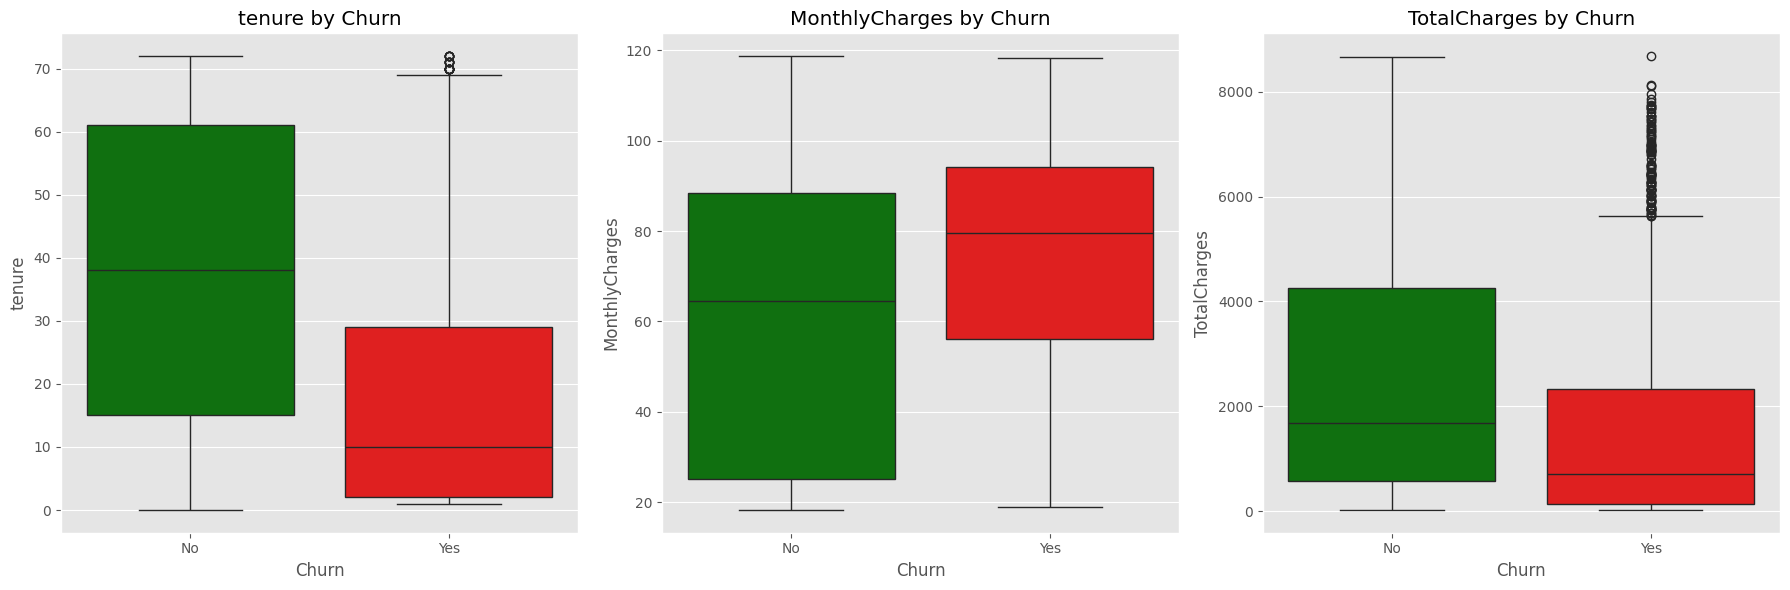

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

color_map = {'Yes':'red', 'No':'green'}

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    # Plot the boxplot on the current axis
    sns.boxplot(x='Churn', y=col, data=df, palette=color_map, ax=axes[i])
    
    # Set the title for the current subplot
    axes[i].set_title(f"{col} by Churn")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

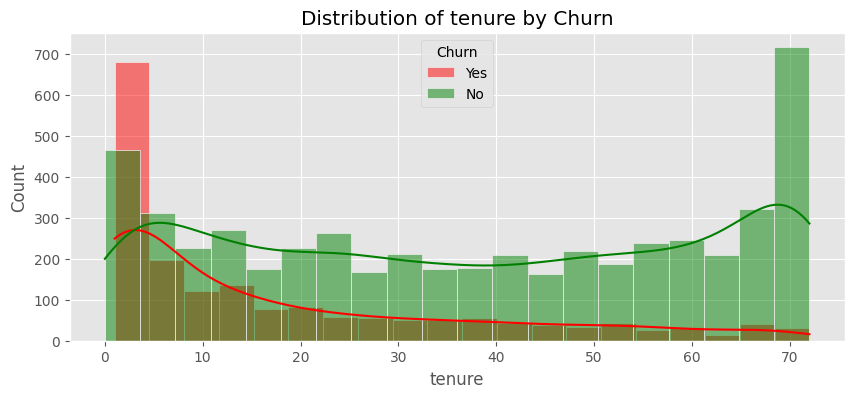

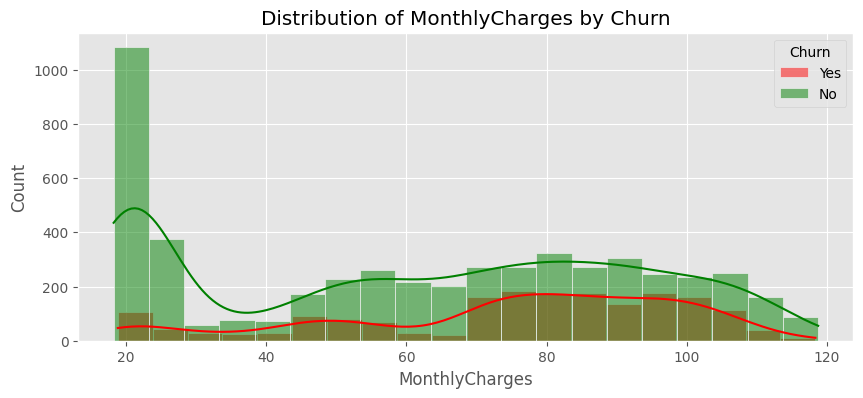

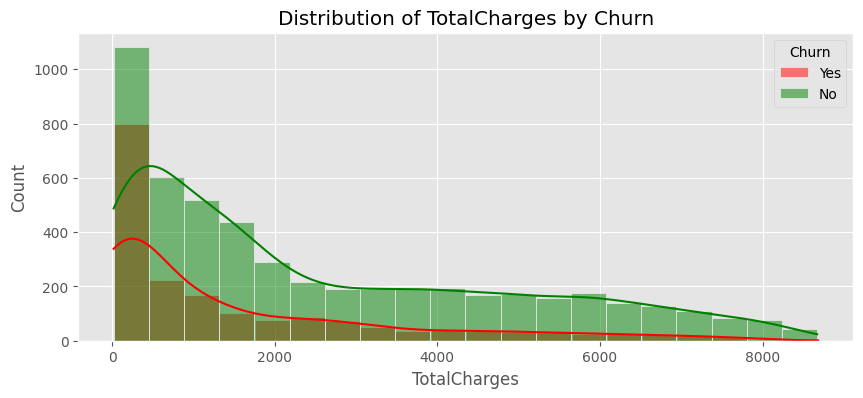

In [18]:
for col in numerical_features:
    plt.figure(figsize=(10,4))
    for label, color in color_map.items():
        subset = df[df['Churn']==label]
        sns.histplot(subset[col], color=color, label=label, kde=True, bins=20, alpha=0.5)
    plt.title(f"Distribution of {col} by Churn")
    plt.legend(title="Churn")
    plt.show()


### Multivariate Analysis

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


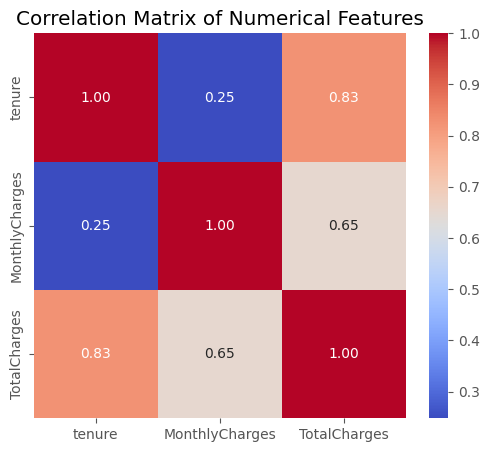

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Compute correlation matrix
corr_matrix = df[numerical_features].corr()
display(corr_matrix)

# Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


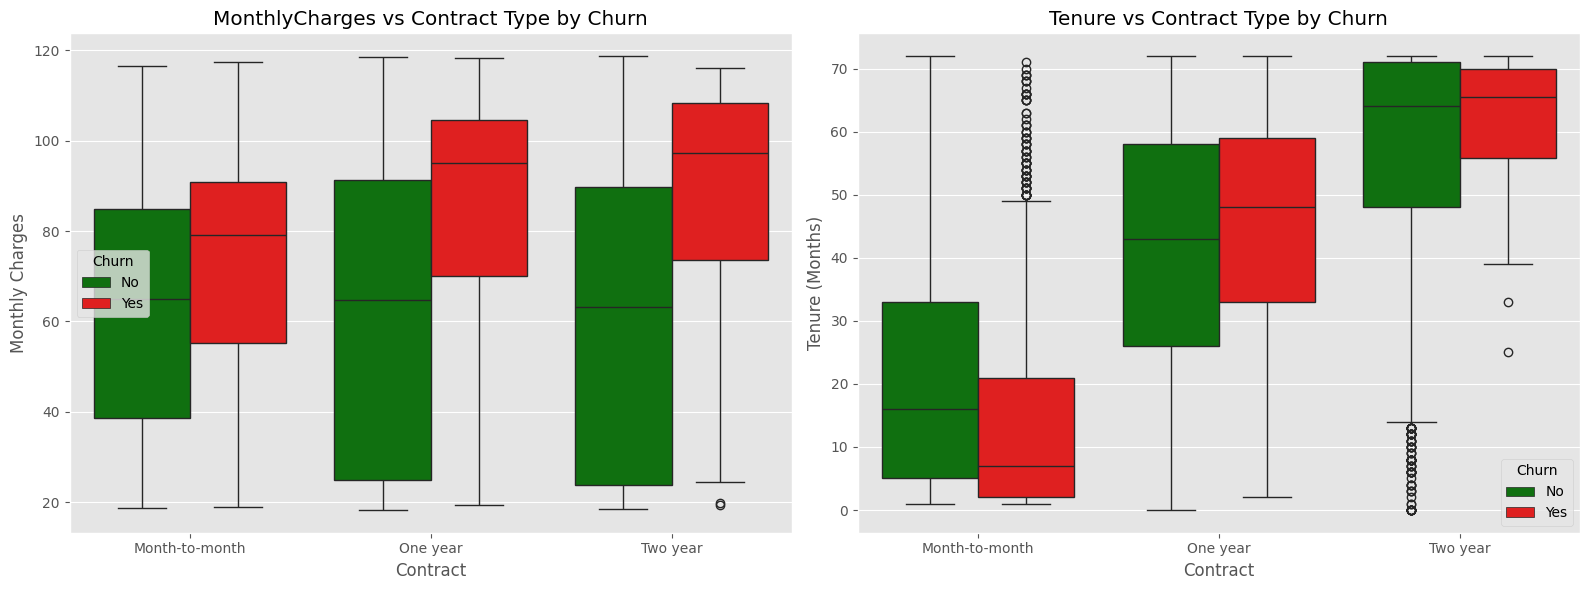

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Consistent palette for both plots
# Yes (Churn) = Red, No (Retained) = Green
palette_colors = {'Yes': 'red', 'No': 'green'}

# 1. Create figure with 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Monthly Charges ---
sns.boxplot(
    x='Contract', 
    y='MonthlyCharges', 
    hue='Churn', 
    data=df, 
    palette=palette_colors, 
    ax=axes[0]
)
axes[0].set_title("MonthlyCharges vs Contract Type by Churn")
axes[0].set_xlabel("Contract")
axes[0].set_ylabel("Monthly Charges")

# --- Plot 2: Tenure ---
sns.boxplot(
    x='Contract', 
    y='tenure', 
    hue='Churn', 
    data=df, 
    palette=palette_colors, 
    ax=axes[1]
)
axes[1].set_title("Tenure vs Contract Type by Churn")
axes[1].set_xlabel("Contract")
axes[1].set_ylabel("Tenure (Months)")

plt.tight_layout()
plt.show()

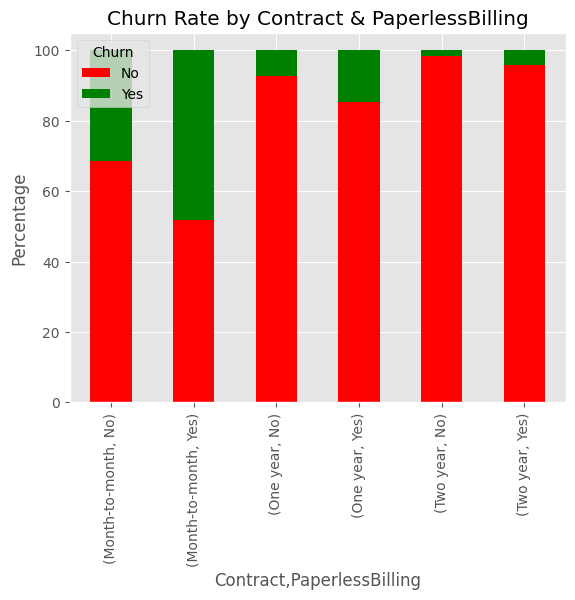

In [21]:
# Contract + PaperlessBilling effect on Churn
interaction = pd.crosstab([df['Contract'], df['PaperlessBilling']], df['Churn'])
interaction_percent = interaction.div(interaction.sum(axis=1), axis=0) * 100
interaction_percent.plot(kind='bar', stacked=True, color={'Yes':'green','No':'red'})
plt.title("Churn Rate by Contract & PaperlessBilling")
plt.ylabel("Percentage")
plt.show()
